In [2]:
# Chạy lệnh này nếu sử dụng Google Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load tập train và tập test đã tách từ
import pickle

X_data = pickle.load(open('/content/drive/MyDrive/Project 3/X_data.pkl', 'rb'))
y_data = pickle.load(open('/content/drive/MyDrive/Project 3/y_data.pkl', 'rb'))

X_test = pickle.load(open('/content/drive/MyDrive/Project 3/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/drive/MyDrive/Project 3/y_test.pkl', 'rb'))

In [4]:
# Tạo mảng biểu diễn tần số xuất hiện của các từ trong tập train
n = len(X_data)

word_dict = {}
document_len = []

for doc in X_data:
  text = doc.split(' ')
  document_len.append(len(text))
  for word in text:
    if word in word_dict.keys():
      word_dict[word] += 1
    else:
      word_dict[word] = 1

In [5]:
# Liệt kê 100 stopword
sorted_frequency_words = sorted(word_dict.items(), key=lambda x:x[1])

stop_words = []
for word in sorted_frequency_words[-100:]:
  stop_words.append(word[0])
print("100 stop words xuất hiện nhiều nhất trong bộ dữ liệu: ", stop_words)

100 stop words xuất hiện nhiều nhất trong bộ dữ liệu:  ['loại', 'điều', 'thấy', 'bộ', 'do', 'đều', 'cần', 'cùng', 'cao', 'gì', 'nào', 'điểm', 'cô', 'việt_nam', 'con', 'bóng', 'thứ', 'chưa', 'tháng', 'trường', 'rằng', 'hay', 'lần', 'nói', 'nên', 'cả', 'bằng', 'qua', 'nếu', 'phim', 'khác', 'đây', 'đội', 'nước', 'vì', 'tới', 'nhà', 'vẫn', 'trận', 'việc', 'biết', 'lên', 'họ', 'đang', 'ông', 'đi', 'bị', 'ngày', 'mà', 'trước', 'sự', 'mới', 'nhất', 'theo', 'hai', 'thì', 'có_thể', 'bạn', 'mình', 'chỉ', 'rất', 'hơn', 'làm', 'lại', 'còn', 'như', 'sau', 'tại', 'ra', 'trên', 'năm', 'anh', 'từ', 'nhưng', 'đó', 'phải', 'nhiều', 'về', 'đến', 'vào', 'cũng', 'tôi', 'sẽ', 'này', 'để', 'khi', 'người', 'đã', 'những', 'không', 'với', 'cho', 'một', 'được', 'các', 'trong', 'có', 'là', 'và', 'của']


In [6]:
# Loại bỏ stopword trong tập train
new_X_data = []
new_document_len = []
for i in range (0, len(X_data)):
  text = X_data[i].split(' ')
  new_text = ""
  for word in text:
    if word in stop_words:
      continue
    else:
      new_text += word
      new_text += ' '
  new_X_data.append(new_text)
  new_document_len.append(len(new_text.split(' ')))

In [7]:
# Loại bỏ stopword trong tập test
new_X_test = []
new_test_document_len = []
for i in range (0, len(X_test)):
  text = X_test[i].split(' ')
  new_text = ""
  for word in text:
    if word in stop_words:
      continue
    else:
      new_text += word
      new_text += ' '
  new_X_test.append(new_text)
  new_test_document_len.append(len(new_text.split(' ')))

In [62]:
# Hiển thị một văn bản sau khi đã loại bỏ stop words
new_X_data[100]

'chọn mua chăn_gối trẻ đối_với trẻ sơ_sinh vài tuổi trải giường mini gồm tấm trải chăn gối_đầu gối ôm kích_thước đặt gọn chiếc nôi hoặc lót võng hầu_hết vải cotton khả_năng thấm_hút mồ_hôi khá tốt giặt màu sản_phẩm sử_dụng hóa_chất gây ảnh_hưởng sức_khỏe trẻ sản_phẩm nhập trung_quốc sản_phẩm trung_quốc giá đồng_bộ chăn tấm trải gối nằm gối ôm gối vải cotton lót bông gòn giữa lõm xuống tiện gối_đầu bé tuy_nhiên tấm trải lớp vải cotton lớp dưới nhựa lót_mút bông mềm giữa sản_phẩm sản_xuất bà mẹ lựa_chọn hiện_nay công_ty thắng_lợi trải giường baby thắng_lợi gồm tấm trải chăn gối_đầu gối ôm dành bé sơ_sinh tuổi đặc_biệt bên tấm trải chăn gối lót bông gòn công_nghiệp bên ngoài vải cotton in hình_trăng_sao hình_thú ngộ_nghĩnh giá mỗi khoảng đồng tuy_nhiên gối_đầu gối ôm mua_lẻ từng giá đồng chiếc bé lớn chừng ba tuổi mẫu_mã đa_dạng công_ty đưa thị_trường tấm thảm vải bố lót_mút giữa không_chỉ cảm_giác êm_ái tấm thảm thiết_kế hình_hà_mã đầu chân màu_sắc sặc_sỡ giúp bé cảm_giác nằm tấm đồ_chơi

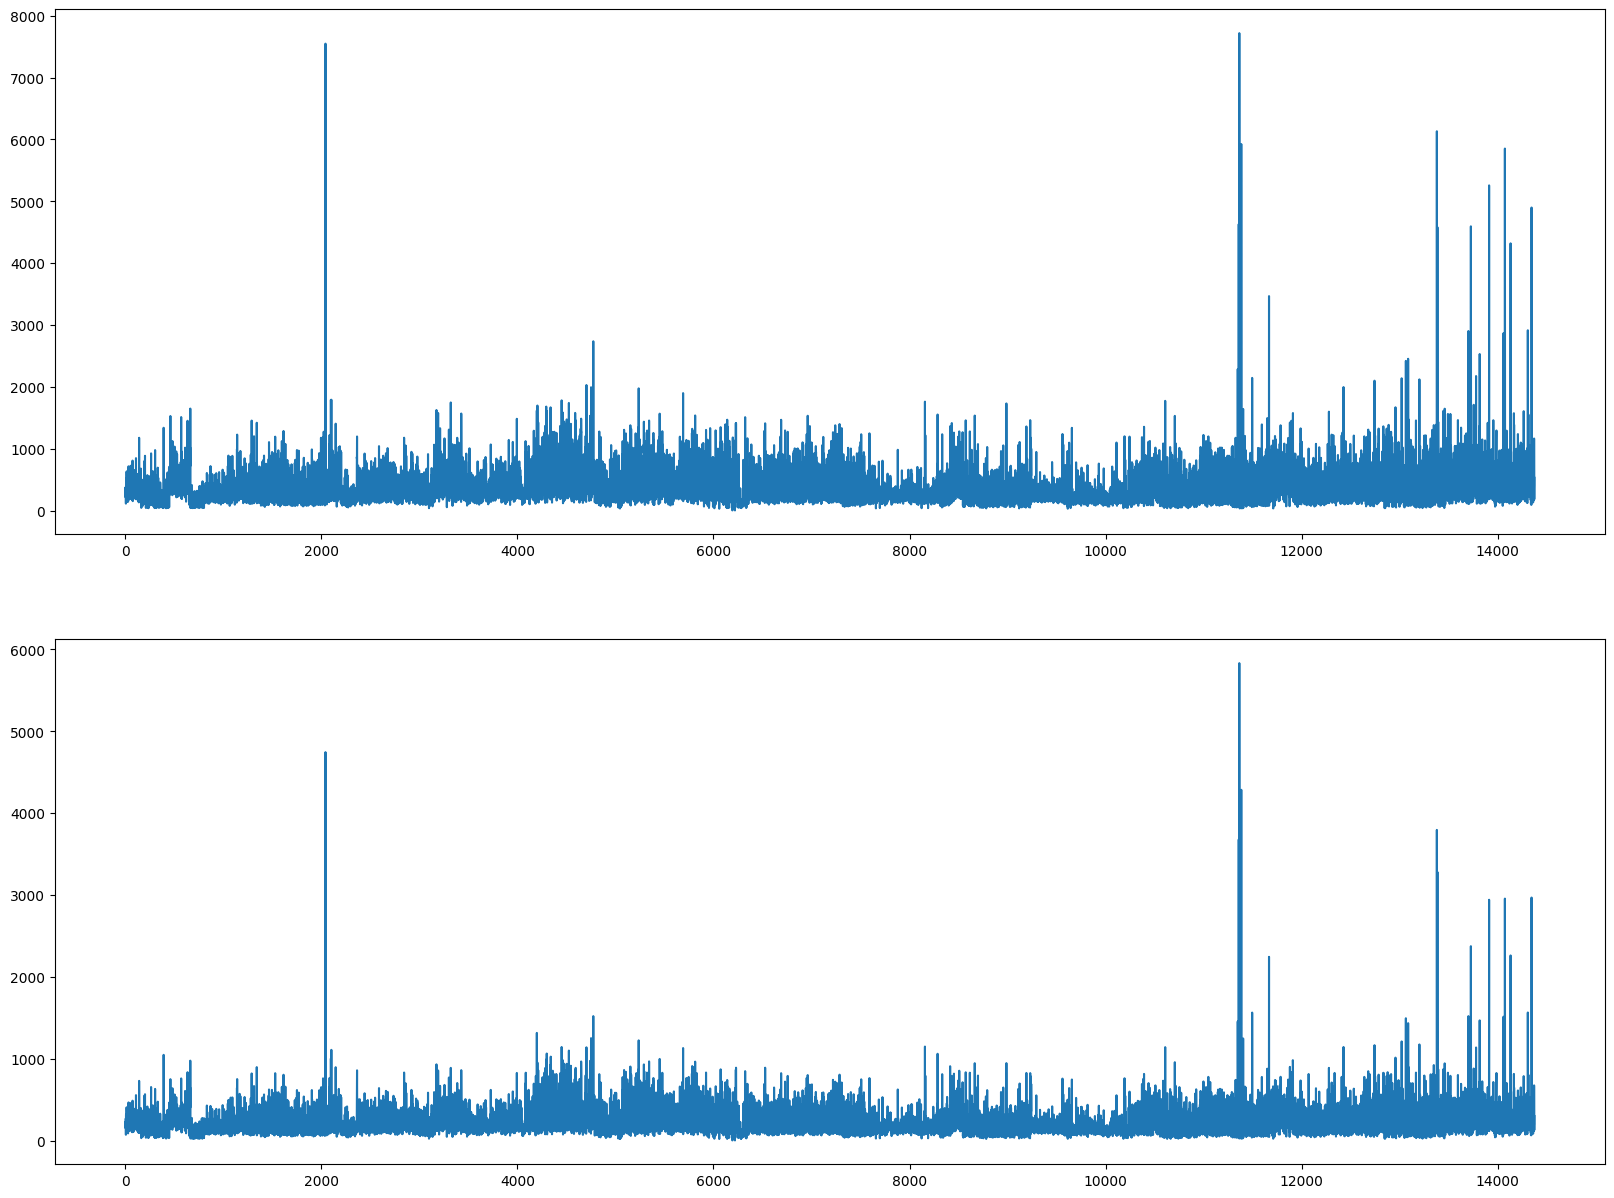

In [63]:
# Hiển thị phân bố độ dài văn bản trước và sau khi loại bỏ stop words
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, figsize=(20, 15))
axs[0].plot(document_len)
axs[1].plot(new_document_len)

In [8]:
# Tính TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 2), max_df=0.5, analyzer='word', max_features=30000)
tfidf_vect.fit(new_X_data)

TfidfVectorizer(max_df=0.5, max_features=30000, ngram_range=(1, 2))

In [9]:
# Tính TF-IDF
X_data_tfidf =  tfidf_vect.transform(new_X_data)
X_test_tfidf =  tfidf_vect.transform(new_X_test)

In [10]:
# Giảm chiều dữ liệu bằng SVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_data_tfidf)

X_data_tfidf_svd = svd.transform(X_data_tfidf)
X_test_tfidf_svd = svd.transform(X_test_tfidf)

In [11]:
# Mã hóa label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_data_n = encoder.fit_transform(y_data)
y_test_n = encoder.fit_transform(y_test)
y_data_n[1001]


17

In [12]:
import sklearn
from sklearn import naive_bayes as nb
from sklearn.metrics import accuracy_score, f1_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [33]:
def train_model(classifier, new_X_data, y_data, new_X_test, y_test, is_neuralnet=False):
    X_train, X_val, y_train, y_val = train_test_split(new_X_data, y_data, test_size=0.1, random_state=42)

    if is_neuralnet:
        classifier.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=512)

        val_predictions = classifier.predict(X_val)
        test_predictions = classifier.predict(new_X_test)
        val_predictions = val_predictions.argmax(axis=-1)
        test_predictions = test_predictions.argmax(axis=-1)
    else:
        classifier.fit(X_train, y_train)

        train_predictions = classifier.predict(X_train)
        val_predictions = classifier.predict(X_val)
        test_predictions = classifier.predict(new_X_test)

    print("Validation accuracy: ", metrics.accuracy_score(val_predictions, y_val))
    print("Test accuracy: ", metrics.accuracy_score(test_predictions, y_test))


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
train_model(LogisticRegression(), X_data_tfidf_svd, y_data, X_test_tfidf_svd, y_test, is_neuralnet=False)


Validation accuracy:  0.8824756606397774
Test accuracy:  0.8867174561112952


In [16]:
from sklearn import svm

In [17]:
train_model(svm.SVC(), X_data_tfidf_svd, y_data, X_test_tfidf_svd, y_test, is_neuralnet=False)


Validation accuracy:  0.8963838664812239
Test accuracy:  0.9045213646902948


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
train_model(RandomForestClassifier(), X_data_tfidf_svd, y_data, X_test_tfidf_svd, y_test, is_neuralnet=False)


Validation accuracy:  0.8692628650904033
Test accuracy:  0.8714806227227558


In [31]:
from keras.layers import Input, Reshape, LSTM, Dense
from keras import models
from keras import optimizers

def create_lstm_model():
    input_layer = Input(shape=(300,))

    layer = Reshape((10, 30))(input_layer)
    layer = LSTM(128, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)

    output_layer = Dense(27, activation='softmax')(layer)

    classifier = models.Model(input_layer, output_layer)

    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return classifier

In [34]:
classifier = create_lstm_model()
train_model(classifier=classifier, new_X_data=X_data_tfidf_svd, y_data=y_data_n, new_X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True)

Epoch 1/30
26/26 [==============================] - 6s 116ms/step - loss: 3.1739 - accuracy: 0.1250 - val_loss: 3.1001 - val_accuracy: 0.1293
Epoch 2/30
26/26 [==============================] - 3s 100ms/step - loss: 3.0608 - accuracy: 0.1292 - val_loss: 2.9764 - val_accuracy: 0.1293
Epoch 3/30
26/26 [==============================] - 3s 100ms/step - loss: 2.7826 - accuracy: 0.1418 - val_loss: 2.7043 - val_accuracy: 0.1634
Epoch 4/30
26/26 [==============================] - 3s 107ms/step - loss: 2.5987 - accuracy: 0.1880 - val_loss: 2.5204 - val_accuracy: 0.2191
Epoch 5/30
26/26 [==============================] - 4s 166ms/step - loss: 2.3476 - accuracy: 0.2476 - val_loss: 2.2291 - val_accuracy: 0.2538
Epoch 6/30
26/26 [==============================] - 3s 100ms/step - loss: 2.1121 - accuracy: 0.2923 - val_loss: 2.0187 - val_accuracy: 0.3331
Epoch 7/30
26/26 [==============================] - 3s 99ms/step - loss: 1.9543 - accuracy: 0.3356 - val_loss: 1.8846 - val_accuracy: 0.3637
Epoch 8

In [35]:
from keras.layers import Input, Reshape, GRU, Dense
from keras import models
from keras import optimizers

def create_gru_model():
    input_layer = Input(shape=(300,))

    layer = Reshape((10, 30))(input_layer)
    layer = GRU(128, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)

    output_layer = Dense(27, activation='softmax')(layer)

    classifier = models.Model(input_layer, output_layer)

    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return classifier


In [36]:
classifier = create_gru_model()
train_model(classifier=classifier, new_X_data=X_data_tfidf_svd, y_data=y_data_n, new_X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True)

Epoch 1/30
26/26 [==============================] - 5s 101ms/step - loss: 3.1624 - accuracy: 0.1255 - val_loss: 3.1217 - val_accuracy: 0.1293
Epoch 2/30
26/26 [==============================] - 2s 89ms/step - loss: 3.0930 - accuracy: 0.1292 - val_loss: 3.1005 - val_accuracy: 0.1293
Epoch 3/30
26/26 [==============================] - 2s 89ms/step - loss: 3.0839 - accuracy: 0.1292 - val_loss: 3.0926 - val_accuracy: 0.1293
Epoch 4/30
26/26 [==============================] - 3s 102ms/step - loss: 2.9512 - accuracy: 0.1343 - val_loss: 2.7940 - val_accuracy: 0.1606
Epoch 5/30
26/26 [==============================] - 4s 144ms/step - loss: 2.6424 - accuracy: 0.1946 - val_loss: 2.5065 - val_accuracy: 0.2302
Epoch 6/30
26/26 [==============================] - 2s 89ms/step - loss: 2.3867 - accuracy: 0.2506 - val_loss: 2.2526 - val_accuracy: 0.2587
Epoch 7/30
26/26 [==============================] - 2s 86ms/step - loss: 2.1569 - accuracy: 0.3005 - val_loss: 2.0446 - val_accuracy: 0.3178
Epoch 8/30

In [41]:
from keras.layers import Bidirectional

def create_brnn_model():
    input_layer = Input(shape=(300,))

    layer = Reshape((10, 30))(input_layer)
    layer = Bidirectional(GRU(128, activation='relu'))(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)

    output_layer = Dense(27, activation='softmax')(layer)

    classifier = models.Model(input_layer, output_layer)

    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return classifier


In [42]:
classifier = create_brnn_model()
train_model(classifier=classifier, new_X_data=X_data_tfidf_svd, y_data=y_data_n, new_X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True)

Epoch 1/30
26/26 [==============================] - 8s 156ms/step - loss: 3.0381 - accuracy: 0.1645 - val_loss: 2.6332 - val_accuracy: 0.2983
Epoch 2/30
26/26 [==============================] - 4s 139ms/step - loss: 2.0221 - accuracy: 0.4912 - val_loss: 1.4502 - val_accuracy: 0.5974
Epoch 3/30
26/26 [==============================] - 5s 205ms/step - loss: 1.1589 - accuracy: 0.6817 - val_loss: 1.0177 - val_accuracy: 0.6961
Epoch 4/30
26/26 [==============================] - 4s 152ms/step - loss: 0.8668 - accuracy: 0.7414 - val_loss: 0.8125 - val_accuracy: 0.7573
Epoch 5/30
26/26 [==============================] - 4s 139ms/step - loss: 0.7248 - accuracy: 0.7789 - val_loss: 0.7201 - val_accuracy: 0.7719
Epoch 6/30
26/26 [==============================] - 4s 147ms/step - loss: 0.6492 - accuracy: 0.8016 - val_loss: 0.6553 - val_accuracy: 0.7921
Epoch 7/30
26/26 [==============================] - 6s 211ms/step - loss: 0.5828 - accuracy: 0.8206 - val_loss: 0.6177 - val_accuracy: 0.7907
Epoch 

In [53]:
from keras.layers import Conv1D
from keras.layers import Flatten


def create_rcnn_model():
    input_layer = Input(shape=(300,))

    layer = Reshape((10, 30))(input_layer)
    layer = Bidirectional(GRU(128, activation='relu', return_sequences=True))(layer)
    layer = Conv1D(100, 3, activation="relu")(layer)
    layer = Flatten()(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)

    output_layer = Dense(27, activation='softmax')(layer)

    classifier = models.Model(input_layer, output_layer)
    classifier.summary()
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return classifier


In [54]:
classifier = create_rcnn_model()
train_model(classifier=classifier, new_X_data=X_data_tfidf_svd, y_data=y_data_n, new_X_test=X_test_tfidf_svd, y_test=y_test_n, is_neuralnet=True)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 300)]             0         
                                                                 
 reshape_16 (Reshape)        (None, 10, 30)            0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 10, 256)           122880    
 onal)                                                           
                                                                 
 conv1d_2 (Conv1D)           (None, 8, 100)            76900     
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_40 (Dense)            (None, 512)               410112    
                                                          

In [58]:
#from tqdm import tqdm
#import gensim
#
#
#def get_corpus(documents):
#    corpus = []
#
#    for i in tqdm(range(len(documents))):
#        doc = documents[i]
#
#        words = doc.split(' ')
#        tagged_document = gensim.models.doc2vec.TaggedDocument(words, [i])
#
#        corpus.append(tagged_document)
#
#    return corpus
#
#train_corpus = get_corpus(new_X_data)
#test_corpus = get_corpus(new_X_test)


100%|██████████| 12076/12076 [00:06<00:00, 1811.27it/s]


In [59]:
#model = gensim.models.doc2vec.Doc2Vec(vector_size=300, min_count=2, epochs=40)
#model.build_vocab(train_corpus)

#%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)


CPU times: user 13min 15s, sys: 7.06 s, total: 13min 22s
Wall time: 8min 26s


In [60]:

X_data_vectors = []
for x in train_corpus:
    vector = model.infer_vector(x.words)
    X_data_vectors.append(vector)

X_test_vectors = []
for x in test_corpus:
    vector = model.infer_vector(x.words)
    X_test_vectors.append(vector)


In [55]:
#Thử nghiệm để tìm tham số tốt nhất cho thuật toán k-nearest-neighbor
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Mảng lưu kết quả thí nghiệm
val_acc = []
val_f1 = []
train_acc = []
train_f1 = []
# Mảng lưu các tham số k
arr = [3,5,7,9,11,15,19,25,31]

X_train, X_val, y_train, y_val = train_test_split(X_data_tfidf_svd, np.array(y_data_n), test_size=0.2, random_state=42)

for k in arr:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  train_predictions = knn.predict(X_train)
  val_predictions = knn.predict(X_val)
  val_acc.append(accuracy_score(val_predictions, y_val))
  train_acc.append(accuracy_score(train_predictions, y_train))
  val_f1.append(f1_score(val_predictions, y_val, average='weighted'))
  train_f1.append(f1_score(train_predictions, y_train, average='weighted'))

In [56]:
val_f1

[0.8348030829930546,
 0.8376473371918526,
 0.8395054074224583,
 0.8450955974816603,
 0.8467687490483039,
 0.8425757952900967,
 0.8374195831594164,
 0.8342414444638099,
 0.8324930155291276]

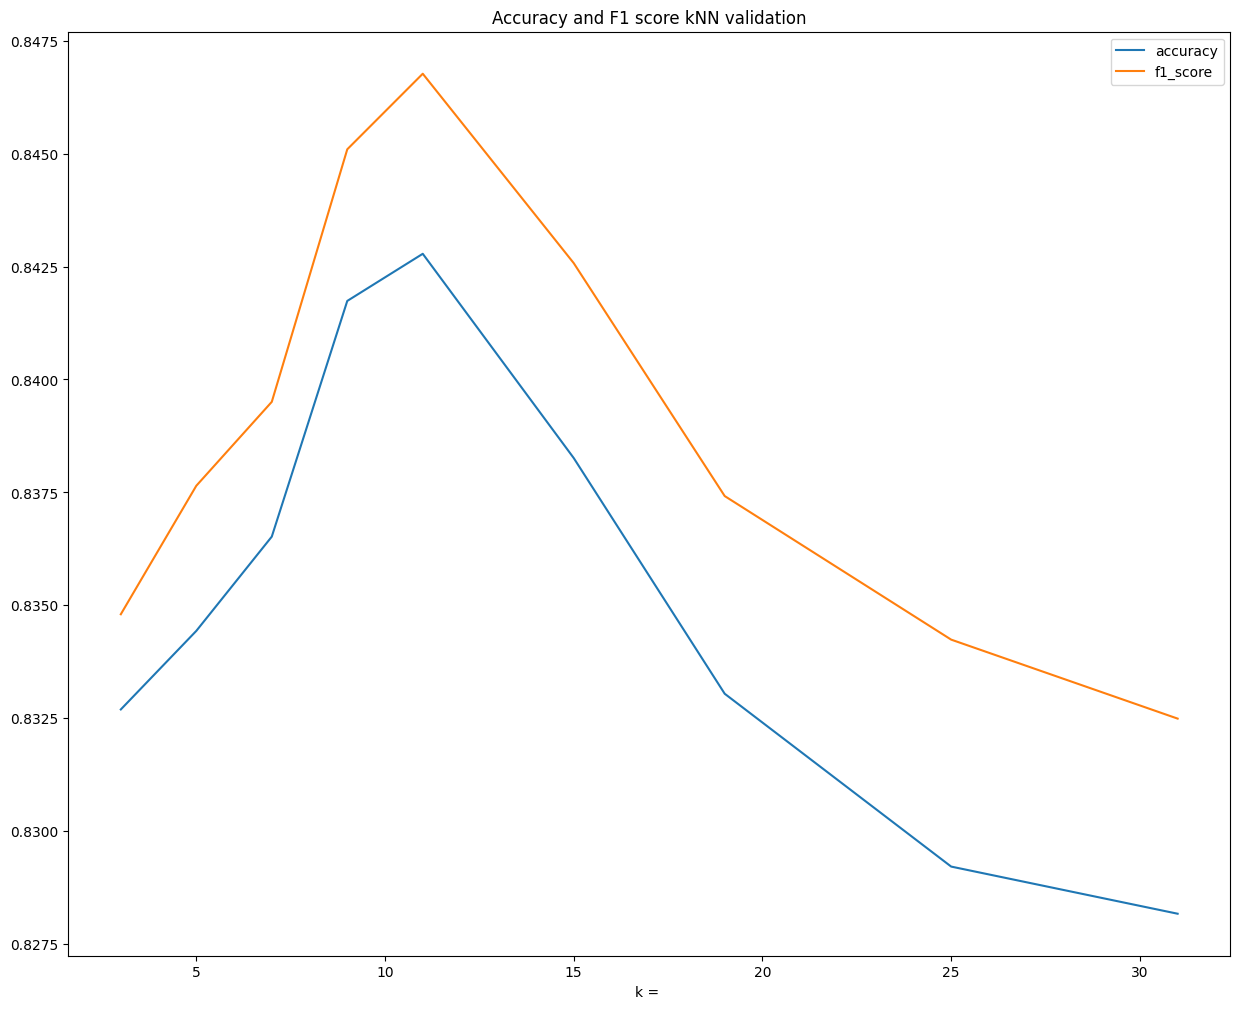

In [64]:
# Biểu đồ minh họa đối với tập validation
plt.figure(figsize=(15,12))
plt.plot(arr, val_acc)
plt.plot(arr, val_f1)
plt.title('Accuracy and F1 score kNN validation')
plt.ylabel('')
plt.xlabel('k = ')
plt.legend(['accuracy', 'f1_score'], loc='upper right')
plt.show()

In [65]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

val_predictions = knn.predict(X_val)
val_acc = accuracy_score(val_predictions, y_val)
val_f1 = f1_score(val_predictions, y_val, average='weighted')

print("Validation accuracy:", val_acc)
print("Validation F1 score:", val_f1)

Validation accuracy: 0.8427826086956521
Validation F1 score: 0.8467687490483039


In [66]:
# Thử nghiệm với Naive Bayes
# bộ tham số alpha
alphas = [0.000001, 0.00001, 0.0001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
# Mảng lưu kết quả thí nghiệm
val_acc = []
val_f1 = []
train_acc = []
train_f1 = []

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_data_tfidf, y_data, test_size=0.1, random_state=42)

for alpha in alphas:
  model=nb.MultinomialNB(alpha=alpha, fit_prior=True)

  model.fit(X_train, y_train)

  train_predictions = model.predict(X_train)
  val_predictions = model.predict(X_val)
  val_acc.append(accuracy_score(val_predictions, y_val))
  train_acc.append(accuracy_score(train_predictions, y_train))
  val_f1.append(f1_score(val_predictions, y_val, average='weighted'))
  train_f1.append(f1_score(train_predictions, y_train, average='weighted'))

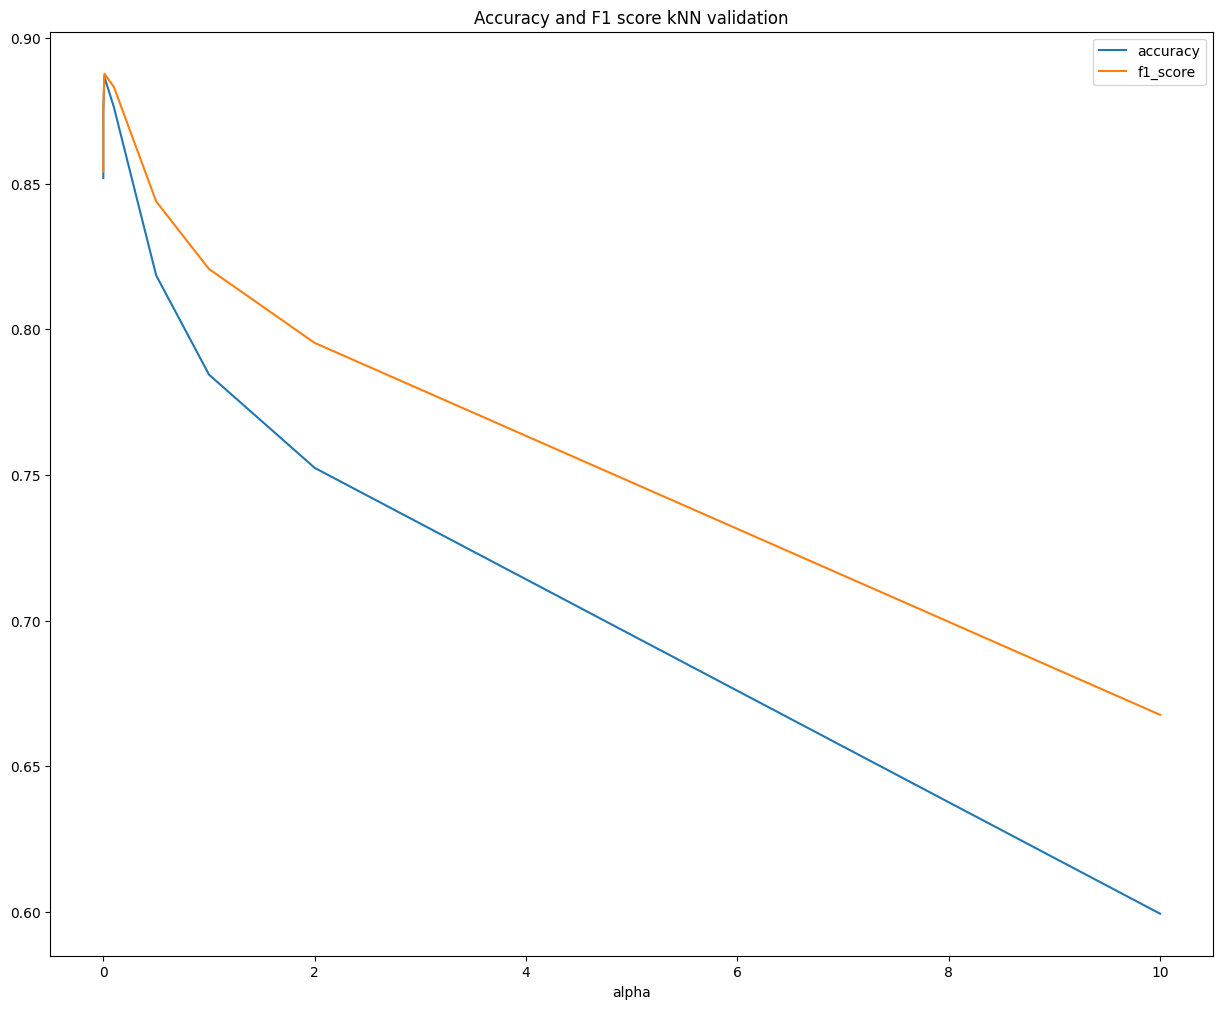

In [67]:
# Biểu đồ minh họa đối với tập validation
plt.figure(figsize=(15,12))
plt.plot(alphas, val_acc)
plt.plot(alphas, val_f1)
plt.title('Accuracy and F1 score kNN validation')
plt.ylabel('')
plt.xlabel('alpha')
plt.legend(['accuracy', 'f1_score'], loc='upper right')
plt.show()

In [68]:
# Train với Naive Bayes
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_data_tfidf, y_data, test_size=0.1, random_state=42)
model=nb.MultinomialNB(alpha=0.01, fit_prior=True)

model.fit(X_train, y_train)

val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test_tfidf)

print("Validation accuracy: ", sklearn.metrics.accuracy_score(val_predictions, y_val))
print("Test accuracy: ", sklearn.metrics.accuracy_score(test_predictions, y_test))

Validation accuracy:  0.8866481223922114
Test accuracy:  0.8916859887379928


In [69]:
# Tính k-fold cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Cross-validation scores:[0.90262751 0.9064915  0.89721793 0.89103555 0.89258114 0.9057187
 0.90030912 0.90641918 0.90100541 0.90487239]
Average cross-validation score: 0.9008


In [70]:
x=500
print(X_test[x])
print(test_predictions[x])
print(y_data_n[x])

niềm yêu_thích của các chàng khi còn tự_do các ông thích đủ thứ trên đời đến khi đã bị trói buộc thì sở_thích của các ông cũng có ít_nhiều thay_đổi tạp_chí_redbook của mỹ đã thống_kê được như sau thích ngắm nhìn những chiếc máy_bay lạ khi có một cô gái đẹp đi ngang qua đa_số các ông đều chăm_chú ngắm nhìn cho_dù có bà_xã kề bên các ông giải_thích về hành_động này như sau chúng_tôi giống như những chiếc radar vậy thôi chúng_tôi luôn phát_hiện ra những chiếc máy_bay lạ trên bầu_trời và hướng về phía đó nhưng không có định gắn_bó với những chiếc máy_bay ấy đâu thích một_chút tự_do một cuộc khảo_sát mỹ đã cho thấy rằng có hơn triệu người đàn_ông chơi đánh golf ít_nhất lần tuần nhưng đến trong số họ thú_thật mình chơi dở_ẹc đi đánh golf thật_sự chỉ là cái cớ để được ra khỏi nhà một lúc hít thở không_khí tự_do nhất là nếu bà_xã lại hay có tật mè_nheo thích chinh_phục mục_tiêu mới đối_với căn_bệnh này trừ một_số các ông thuộc loại quá cứng_đầu cứng_cổ mới lo hết thuốc chữa còn lại đa_số các ô

In [71]:
from keras.layers import Dense, Input, Dropout
from keras import models, optimizers

In [72]:
# Model DNN
def create_dnn_model():
    input_layer = Input(shape=(300,))
    layer = Dense(1024, activation='relu')(input_layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(256, activation='sigmoid')(layer)
    layer = Dense(64, activation='relu')(layer)
    output_layer = Dense(27, activation='softmax')(layer)

    classifier = models.Model(input_layer, output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return classifier

In [73]:
import matplotlib.pyplot as plt
def plot_history(history):
  print(history.history.keys())
# summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [74]:
# Biến đổi label sang dạng one-hot vector
import numpy as np

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False)
y_train_onehot = onehot.fit_transform(np.array(y_data).reshape(-1,1))
y_test_onehot = onehot.fit_transform(np.array(y_test).reshape(-1,1))
print(len(y_train_onehot))
print(len(y_test_onehot))

14375
12076


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
# Tách tập train thành tập train và vaidation
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_data_tfidf_svd, np.array(y_train_onehot), test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)

(12937, 300)
(12937, 27)


In [76]:

# Train model
model_dnn=create_dnn_model()
model_dnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model_dnn.fit(X_train, y_train, validation_split=0.3, epochs=10, verbose=1)

Epoch 1/10
283/283 [==============================] - 7s 20ms/step - loss: 1.4045 - accuracy: 0.6221 - val_loss: 0.5944 - val_accuracy: 0.8359
Epoch 2/10
283/283 [==============================] - 7s 24ms/step - loss: 0.4545 - accuracy: 0.8711 - val_loss: 0.4726 - val_accuracy: 0.8681
Epoch 3/10
283/283 [==============================] - 5s 19ms/step - loss: 0.3463 - accuracy: 0.9008 - val_loss: 0.4305 - val_accuracy: 0.8720
Epoch 4/10
283/283 [==============================] - 6s 23ms/step - loss: 0.2802 - accuracy: 0.9154 - val_loss: 0.4158 - val_accuracy: 0.8815
Epoch 5/10
283/283 [==============================] - 6s 20ms/step - loss: 0.2257 - accuracy: 0.9320 - val_loss: 0.4050 - val_accuracy: 0.8908
Epoch 6/10
283/283 [==============================] - 5s 19ms/step - loss: 0.1891 - accuracy: 0.9424 - val_loss: 0.4526 - val_accuracy: 0.8800
Epoch 7/10
283/283 [==============================] - 7s 24ms/step - loss: 0.1546 - accuracy: 0.9520 - val_loss: 0.4620 - val_accuracy: 0.8769

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


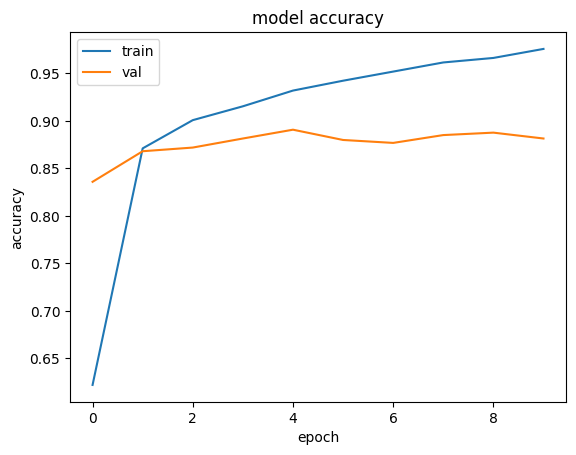

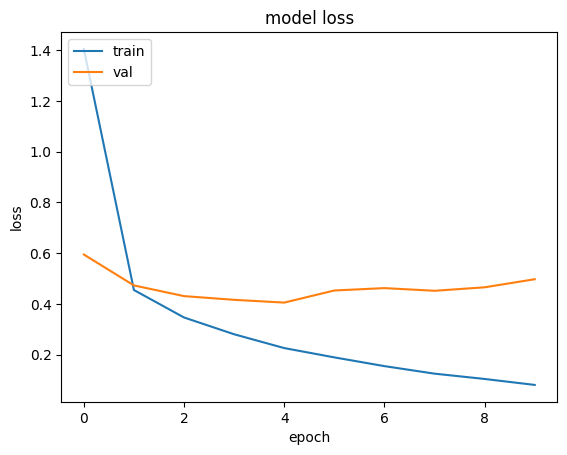

378/378 [==============================] - 4s 11ms/step - loss: 0.5330 - accuracy: 0.8686


[0.5330047011375427, 0.8685823082923889]

In [77]:
# Đánh giá model
plot_history(history)
model_dnn.evaluate(X_val, y_val)
model_dnn.evaluate(X_test_tfidf_svd, y_test_onehot)

In [78]:
y_pred = model_dnn.predict(X_test_tfidf_svd)

378/378 [==============================] - 2s 4ms/step


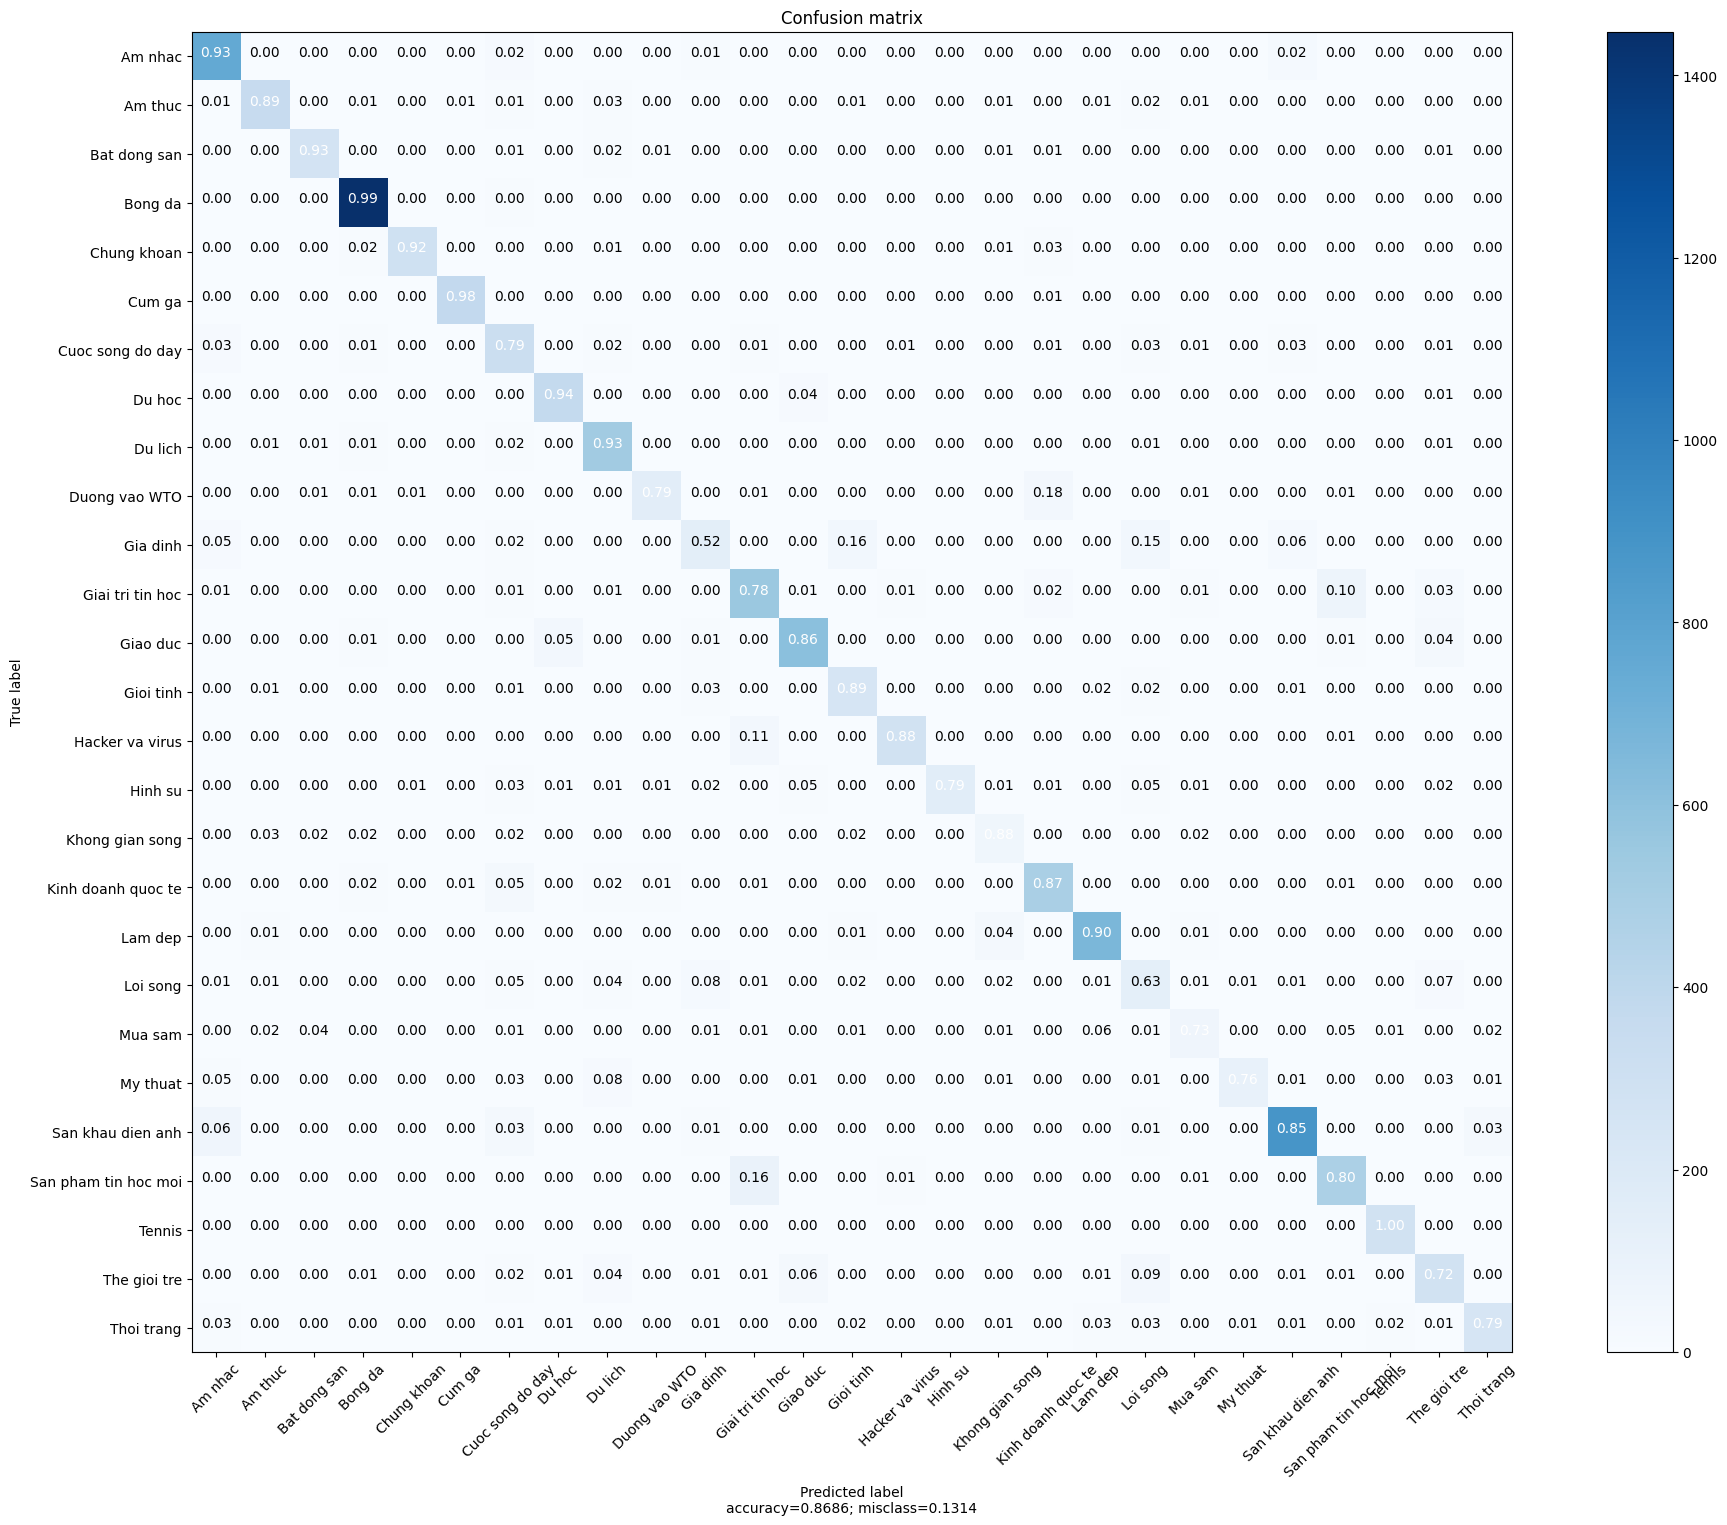

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sn
import pandas as pd

index_array = ['Am nhac', 'Am thuc', 'Bat dong san', 'Bong da', 'Chung khoan', 'Cum ga', 'Cuoc song do day', 'Du hoc', 'Du lich', 'Duong vao WTO',
              'Gia dinh', 'Giai tri tin hoc', 'Giao duc', 'Gioi tinh', 'Hacker va virus', 'Hinh su', 'Khong gian song', 'Kinh doanh quoc te',
              'Lam dep', 'Loi song', 'Mua sam', 'My thuat', 'San khau dien anh', 'San pham tin hoc moi', 'Tennis', 'The gioi tre', 'Thoi trang']
y_test_new = np.array(y_test_n)
y_pred_new = y_pred.argmax(axis=-1)

cm = confusion_matrix(y_test_new, y_pred_new)
df_cm = pd.DataFrame(cm, range(27), range(27))

# Confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm=cm, target_names=index_array)